## Introduction

Let $u = x(1-x) + y(1-y)$. 

PDE $-u_{xx} - u_{yy} = f$ on boundary $\Omega = (0,1) \times (0,1)$, $u=0$ at boundary. Assume $\Delta x = \Delta y = h$

Approximation is then $F_{ij} = -\frac{1}{h^2}\big(u_{i-1j} - 2u_{ij} + u_{i+1j}\big) -\frac{1}{h^2} \big(u_{ij-1} - 2u_{ij} + u_{ij+1}\big)$, where $h$ is (uniform) mesh size

Or equivalently $T \mathbf{U} + \mathbf{U} T = F$, where $u_{ij} = u(x_i, y_j)$ with interior nodes $i,j=1,\dots,n$ and $T = \frac{-1}{h^2} \text{tridiag}(1,-2,1)$

$\frac{-1}{h^2} 
\begin{pmatrix}
-2 & 1 & 0 & \dots & 0 & 0 \\
1 & -2 & 1 & \dots & 0 & 0 \\
0 & 1 & -2 & \dots & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & \dots & -2 & 1 \\
0 & 0 & 0 & \dots & 1 & -2 \\
\end{pmatrix}
\begin{pmatrix}
u_{11} & u_{12} & \dots & u_{1j} & \dots & u_{1n} \\
u_{21} & u_{22} & \dots & u_{2j} & \dots & u_{2n} \\
\vdots & \vdots & \ddots & \vdots & \dots & \vdots \\
u_{i1} & u_{i2} & \dots & u_{ij} & \dots & u_{in} \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
u_{n1} & u_{n2} & \dots & u_{nj} & \dots & u_{nn}
\end{pmatrix}
+
\begin{pmatrix}
u_{11} & u_{12} & \dots & u_{1j} & \dots & u_{1n} \\
u_{21} & u_{22} & \dots & u_{2j} & \dots & u_{2n} \\
\vdots & \vdots & \ddots & \vdots & \dots & \vdots \\
u_{i1} & u_{i2} & \dots & u_{ij} & \dots & u_{in} \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
u_{n1} & u_{n2} & \dots & u_{nj} & \dots & u_{nn}
\end{pmatrix}
\frac{-1}{h^2} 
\begin{pmatrix}
-2 & 1 & 0 & \dots & 0 & 0 \\
1 & -2 & 1 & \dots & 0 & 0 \\
0 & 1 & -2 & \dots & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & \dots & -2 & 1 \\
0 & 0 & 0 & \dots & 1 & -2 \\
\end{pmatrix}
= \mathbf{F}(\mathbf{U})
$

System has $n^2$ unknowns, need to solve $T \mathbf{U} + \mathbf{U} T = \mathbf{F}(\mathbf{U})$

- Best way to compute error? Evaluate $F$ using computed $\mathbf{U}$ and compare against $F=4$, or compare computed $\mathbf{U}$ and $\mathbf{U}=X(1-X) + Y(1-Y)$
- Compare temporal and spatial complexity of algorithms
- Measure error as internal nodes are increased and plot
- Measure time and memory increase as mesh points are increased

## Solving using scipy.linalg solve_sylvester

Error:  0.0015541893348571811


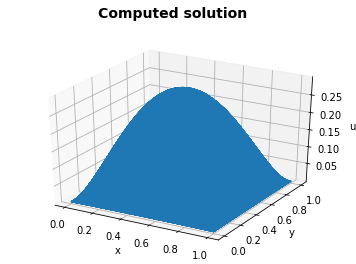

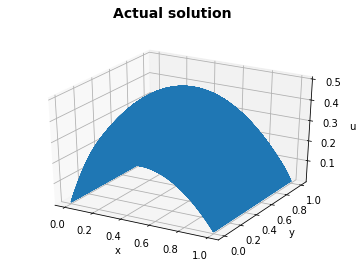

In [2]:
#Import necessary modules
import numpy as np
from scipy.sparse import diags
from scipy.linalg import solve_sylvester #computes solution to AX + XB = Q
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

#Define parameters
N = 1001 #total number of nodes in each direction
n = N-2 #number of internal nodes in each direction (unknowns)
h = 1/(N-1) #step size

#Define x and y as arrays between 0 and 1 with n evenly spaced points (internal nodes)
x = np.linspace(h, 1-h, n)
y = np.linspace(h, 1-h, n)

#Create internal mesh (excludes boundaries)
X, Y = np.meshgrid(x, y, indexing='ij')

# Define F 
F = np.empty([n,n])
for i in range(0, n):
    for j in range(0, n):
        F[i][j] = 4
        
#Define tridiagonal matrix T
diagonals = [[-2],[1],[1]]
T = np.multiply(-1/h**2, diags(diagonals, [0, -1, 1], shape=(n, n)).toarray())
                
#Solve system
U = solve_sylvester(T, T, F)

#Compute exact solution for comparison
U_exact = X*(1-X) + Y*(1-Y)

#Plot computed solution
plt.figure(0)
plt.suptitle('Computed solution', fontsize=14, fontweight='bold')
ax = plt.axes(projection='3d')
xline = np.reshape(X, -1)
yline = np.reshape(Y, -1)
zline = np.reshape(U, -1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
ax.plot3D(xline, yline, zline)

#Plot actual solution
plt.figure(1)
plt.suptitle('Actual solution', fontsize=14, fontweight='bold')
ax = plt.axes(projection='3d')
xline = np.reshape(X, -1)
yline = np.reshape(Y, -1)
zline = np.reshape(U_exact, -1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
ax.plot3D(xline, yline, zline)

#Compare solution against F and calculate error
F_computed = np.reshape(np.matmul(T,U) + np.matmul(U,T),-1)
F = np.reshape(F,-1)
error = 0
for i in range(0,n**2):
    error += np.absolute(F[i]-F_computed[i])
print("Error: ", error)





- N = 11, error = 1.3233858453531866e-12
- N = 101, error = 1.4679217663626787e-07
- N = 1001, error = 0.0015541893348571811


## Solving using similarity transformations

Solving Sylvester equation: $A \mathbf{U} + \mathbf{U} B = F$ 

Solution $\mathbf{U}$ in closed form: Assuming matrices $A$ and $B$ can be diagonalised, $P^{-1}AP = \text{diag}(\lambda_1, \dots, \lambda_n)$ and $Q^{-1} B Q = \text{diag}(\mu_1, \dots, \mu_m)$,

then $\tilde{F} = P^{-1}FQ$ and $\mathbf{U} = P \tilde{\mathbf{U}} Q^{-1}$, with $\tilde{\mathbf{u}}_{ij} = \frac{\tilde{f}_{ij}}{\lambda_i + \mu_j}$.

For $T\mathbf{U} + \mathbf{U}T = F$, $A=B=T \implies P=Q$, so $\tilde{F} = P C P^{-1}$
and solution $\mathbf{U} = P \tilde{\mathbf{U}} P^{-1}$ with $\tilde{\mathbf{u}}_{ij} = \frac{\tilde{f}_{ij}}{\lambda_i + \lambda_j}$

Matrices are the same
Error:  0.0025717466185626314


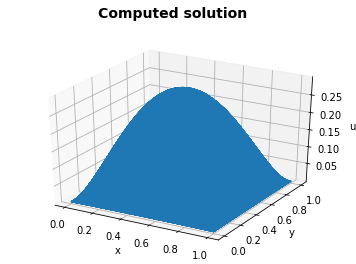

In [3]:
#Import necessary modules
import numpy as np
from scipy.sparse import diags
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

#Define parameters
N = 1001 #total number of nodes in each direction
n = N-2 #number of internal nodes in each direction (unknowns)
h = 1/(N-1) #step size

#Define x and y as arrays between 0 and 1 with n evenly spaced points (internal nodes)
x = np.linspace(h, 1-h, n)
y = np.linspace(h, 1-h, n)

#Create internal mesh (excludes boundaries)
X, Y = np.meshgrid(x, y, indexing='ij')

# Define F 
F = np.empty([n,n])
for i in range(0, n):
    for j in range(0, n):
        F[i][j] = 4
        
#Define tridiagonal matrix T
diagonals = [[-2],[1],[1]]
T = np.multiply(-1/h**2, diags(diagonals, [0, -1, 1], shape=(n, n)).toarray())
                
#Get eigenvalues and eigenvectors of T
eigvals, eigvecs = np.linalg.eig(T)

#Set eigenvalues as diagonal matrix
diag = diags(eigvals, 0, shape=(n, n)).toarray()

#Set basis matrix M, with columns as the eigenvectors
P = eigvecs

#Check to see if M^-1 * T * M == diag
P_computed = np.matmul(np.matmul(np.linalg.inv(P),T),P)

equivalent = True
for i in range(0,n):
    for j in range(0,n):
        if(np.absolute(diag[i][j]-P_computed[i][j])>000000000000.1):
            equivalent = False
if (equivalent==True):
    print('Matrices are the same')

#Define F_hat = P^-1 * F * P
F_hat = np.matmul(np.matmul(np.linalg.inv(P),F),P)

#Calculate U_hat, u_hat(i,j) = f(i,j) / eigval(i) + eigval(j)
U_hat = np.empty([n,n])
for i in range(0,n):
    for j in range(0,n):
        if (eigvals[i]!=0 or eigvals[j]!=0):
            U_hat[i][j] = F_hat[i][j] / (eigvals[i]+eigvals[j])
        else:
            U_hat[i][j] = 0
        
#Calculate solution U = M * U^hat * M^-1
U = np.matmul(np.matmul(P,U_hat),np.linalg.inv(P))

#Plot solution
plt.figure(0)
plt.suptitle('Computed solution', fontsize=14, fontweight='bold')
ax = plt.axes(projection='3d')
xline = np.reshape(X, -1)
yline = np.reshape(Y, -1)
zline = np.reshape(U, -1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
ax.plot3D(xline, yline, zline)

#Compare solution against F and calculate error
F_computed = np.reshape(np.matmul(T,U) + np.matmul(U,T),-1)
F = np.reshape(F,-1)
error = 0
for i in range(0,n**2):
    error += np.absolute(F[i]-F_computed[i])
print("Error: ", error)






- N = 11, error = 1.5756285165480222e-12
- N = 101, error = 1.752680525157757e-07
- N = 1001, error = 0.0025717466185626314

## Solving using Bartels-Stewart algorithm
To solve $A \mathbf{U} + \mathbf{U} B = F$:
1. Compute the Schur forms $A^* = PRP^*$, $B=QSQ^*$
2. Solve $R^* \mathbf{V} + \mathbf{V} S = P^* F Q$ for $\mathbf{V}$
3. Compute $\mathbf{U} = P \mathbf{V} Q^*$

For $T \mathbf{U} + \mathbf{U} T = F$, $A=B=T$ and $T^* = T$:
1. Compute the Schur form $T = PRP^*$
2. Solve $R^* \mathbf{V} + \mathbf{V}R = P^* F P$ for $\mathbf{V}$
3. Compute $\mathbf{U} = P \mathbf{V} P^*$


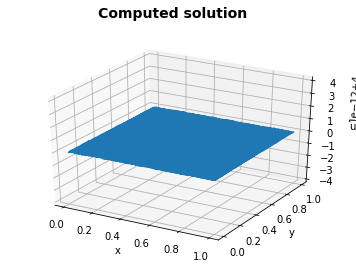

In [18]:
#Import necessary modules
import numpy as np
from scipy.sparse import diags
from scipy.linalg import schur
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

#Define parameters
N = 101 #total number of nodes in each direction
n = N-2 #number of internal nodes in each direction (unknowns)
h = 1/(N-1) #step size

#Define x and y as arrays between 0 and 1 with n evenly spaced points (internal nodes)
x = np.linspace(h, 1-h, n)
y = np.linspace(h, 1-h, n)

#Create internal mesh (excludes boundaries)
X, Y = np.meshgrid(x, y, indexing='ij')

# Define F 
F = np.empty([n,n])
for i in range(0, n):
    for j in range(0, n):
        F[i][j] = 4
        
#Define tridiagonal matrix T
diagonals = [[-2],[1],[1]]
T = np.multiply(-1/h**2, diags(diagonals, [0, -1, 1], shape=(n, n)).toarray())
                
#Compute Schur decomposition
R, P = schur(T)

#Solve R^*V + VR = P^*FP for V
V = np.empty([n,n])
RHS = np.matmul(np.matmul(P.transpose(),F),P)

for i in range(0,n):
    for j in range(0,n):
        
        sum1 = 0
        sum2 = 0
        
        a = 0
        b = 0
    
        while a < i:
            sum1 += R.transpose()[i][a]*V[a][j]
            a += 1
            
        while b < j:
            sum2 += V[i][b]*R[b][j]
            b += 1

        V[i][j] = (RHS[i][j] - sum1 - sum2)/(R.transpose()[i][i]+R[j][j])
            

U = np.matmul(np.matmul(P,V),P.transpose())

#Plot solution
plt.figure(0)
plt.suptitle('Computed solution', fontsize=14, fontweight='bold')
ax = plt.axes(projection='3d')
xline = np.reshape(X, -1)
yline = np.reshape(Y, -1)
zline = np.reshape(U, -1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
ax.plot3D(xline, yline, zline)




